In [1]:
import gzip  # For reading compressed files
from tqdm import tqdm
import json
import matplotlib.pyplot as plt

In [2]:
file_path = "./data/yago-wd-full-types.nt.gz"

try:
    with gzip.open(file_path, 'rb') as f:
        chunk = []
        
        # Use tqdm to wrap the file iterator to track progress
        for line in tqdm(f, total=5394049):
            line_str = line.decode('utf-8').strip()
            chunk.append(line_str)
            
        
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"Error processing RDF data: {e}")

100%|██████████| 5394049/5394049 [00:19<00:00, 274726.46it/s]


In [3]:
organization_list = [
    'Airline', 'Consortium', 'Corporation', 'EducationalOrganization', 'CollegeOrUniversity', 'ElementarySchool', 'HighSchool', 
    'MiddleSchool', 'Preschool', 'School', 'FundingScheme', 'GovernmentOrganization', 'LibrarySystem',
    'AnimalShelter', 'ArchiveOrganization', 'AutoBodyShop', 'AutoDealer', 'AutoPartsStore', 'AutoRental', 
    'AutoRepair', 'AutoWash', 'GasStation', 'MotorcycleDealer', 'MotorcycleRepair', 'ChildCare', ' MedicalOrganization', 'Dentist', ' LocalBusiness', 
    'DryCleaningOrLaundry', 'FireStation', 'Hospital', 'PoliceStation', 'EmploymentAgency', 'AdultEntertainment', 
    'AmusementPark', 'ArtGallery', 'Casino', 'ComedyClub', 'MovieTheater', 'NightClub', 'AccountingService', 
    'AutomatedTeller', 'BankOrCreditUnion', 'InsuranceAgency', 'Bakery', 'BarOrPub', 'Brewery', 'CafeOrCoffeeShop', 
    'Distillery', 'FastFoodRestaurant', 'IceCreamShop', 'Restaurant', 'Winery', 'PostOffice', 'BeautySalon', 
    'DaySpa', 'HairSalon', 'HealthClub', 'NailSalon', 'TattooParlor', 'Electrician', 'GeneralContractor', 
    'HVACBusiness', 'HousePainter', 'Locksmith', 'MovingCompany', 'Plumber', 'RoofingContractor', 'InternetCafe', 
    'Attorney', 'Notary', 'Library', 'BedAndBreakfast', 'Campground', 'Hostel', 'Hotel', 'Motel', 'Resort', 'SkiResort',
    'VacationRental', 'DiagnosticLab', 'NGO', 'NewsMediaOrganization', 'OnlineStore', 'DanceGroup', 'MusicGroup', 
    'TheaterGroup', 'PoliticalParty', 'FundingAgency', 'ResearchProject', 'ResearchOrganization', 
    'SearchRescueOrganization', 'SportsTeam', 'WorkersUnion', 'OnlineBusiness', 'PerformingGroup', 'Project', 'SportsOrganization', 
    'MedicalBusiness', 'CommunityHealth', 'Dermatology', 'DietNutrition', 'Emergency', 'Geriatric', 'Gynecologic',
    'MedicalClinic', 'CovidTestingFacility', 'Midwifery', 'Nursing', 'Obstetric', 'Oncologic', 'Optician', 'Optometric',
    'Otolaryngologic', 'Pediatric', 'Pharmacy', 'Physician', 'IndividualPhysician', 'PhysiciansOffice', 'Physiotherapy',
    'PlasticSurgery', 'Podiatric', 'PrimaryCare', 'Psychiatric', 'PublicHealth', 'ProfessionalService', 'RadioStation',
    'RealEstateAgent', 'RecyclingCenter', 'SelfStorage', 'ShoppingCenter', 'SportsActivityLocation', 'BowlingAlley',
    'ExerciseGym', 'GolfCourse', 'PublicSwimmingPool', 'SportsClub', 'StadiumOrArena', 'TennisComplex',
    'Store', 'BikeStore', 'BookStore', 'ClothingStore', 'ComputerStore', 'ConvenienceStore', 'DepartmentStore',
    'ElectronicsStore', 'Florist', 'FurnitureStore', 'GardenStore', 'GroceryStore', 'HardwareStore', 'HobbyShop',
    'HomeGoodsStore', 'JewelryStore', 'LiquorStore', 'MensClothingStore', 'MobilePhoneStore', 'MovieRentalStore',
    'MusicStore', 'OfficeEquipmentStore', 'OutletStore', 'PawnShop', 'PetStore', 'ShoeStore', 'SportingGoodsStore',
    'TireShop', 'ToyStore', 'WholesaleStore', 'TelevisionStation', 'TouristInformationCenter', 'TravelAgency',
    'VeterinaryCare'
]


person_list = [
    'Patient', 'Human'
]

place_list = [
    'Apartment', 'CampingPitch', 'SingleFamilyResidence', 'HotelRoom', 'MeetingRoom', 'Suite', 'City', 
    'Country', 'SchoolDistrict', 'State', 'Airport', 'Aquarium', 'Beach', 'BoatTerminal', 'Bridge', 'BusStation', 
    'BusStop', 'Campground', 'Cemetery', 'Crematorium', 'EducationalOrganization', 'EventVenue', 'FireStation', 'CityHall', 
    'Courthouse', 'DefenceEstablishment', 'Embassy', 'LegislativeBuilding', 'Hospital', 'MovieTheater', 'Museum', 'MusicVenue', 'Park', 
    'ParkingFacility', 'PerformingArtsTheater', 'PlaceOfWorship', 'BuddhistTemple', 'CatholicChurch', 'HinduTemple', 'Mosque', 'Synagogue', 'Playground', 
    'PoliceStation', 'PublicToilet', 'RVPark', 'StadiumOrArena', 'SubwayStation', 'TaxiStand', 'TrainStation', 'Zoo', 
    'Canal', 'LakeBodyOfWater', 'OceanBodyOfWater', 'Pond', 'Reservoir', 'RiverBodyOfWater', 'SeaBodyOfWater', 
    'Waterfall', 'Continent', 'Mountain', 'Volcano', 'ApartmentComplex', 'GatedResidenceCommunity', 'TouristAttraction', 
    'TouristDestination', 'Accommodation', 'AdministrativeArea', 'CivicStructure', 'Landform', 
    'LandmarksOrHistoricalBuildings', 'LocalBusiness', 'Residence'
]



In [19]:
ORG = []
LOC = []
PERS = []
OTHERS = []


for line in tqdm(chunk):
  
    parts = line.split('\t')
    if len(parts) >= 3:
        input_string = parts[2].rsplit('/', 1)[-1]
        cleaned_string = input_string.rstrip('> .')
        item = parts[0].rsplit('/', 1)[-1].rstrip('> .')
        
        if item in set(mapping_yago_wiki.keys()):
            if cleaned_string in organization_list:
                ORG.append(parts[0])
                #print(f"ORG: {line}")
            elif cleaned_string in place_list:
                LOC.append(parts[0])
                #print(f"LOC: {line}")
            elif cleaned_string in person_list:
                PERS.append(parts[0])
                #print(f"PERS: {line}")
            elif cleaned_string != "": 
                OTHERS.append(line)
                #print(f"OTHERS: {line}")
        else:
            print(cleaned_string)
    


  0%|          | 26/5394049 [00:25<1467:22:18,  1.02it/s]


KeyboardInterrupt: 

In [ ]:
data = {
    "ORG": ORG,
    "LOC": LOC,
    "PERS": PERS,
    "OTHERS": OTHERS
}

# Specify the file path where you want to save the JSON file
json_file_path = "C:/Users/abelo/my-data/entity_classification.json"

# Write the categorized data to a JSON file
try:
    with open(json_file_path, 'w') as json_file:
        json.dump(data, json_file, indent=4)
    print(f"Data saved successfully to {json_file_path}")
except Exception as e:
    print(f"Error saving data to JSON file: {e}")

## Wikidata classification

In [31]:
json_file_path = "C:/ALESSANDRO/Università/MAGISTRALE/SINTEF_thesis/lamAPI/data/qid_to_nertype.json"

w_ORG = []
w_LOC = []
w_PERS = []
w_OTHERS = []

# Read the categorized data from the JSON file
try:
    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)

        for key, value in data.items():
            if value == "ORG":
                w_ORG.append(key) 
            elif value == "LOC":
                w_LOC.append(key)  
            elif value == "PERS":
                w_PERS.append(key) 
            else:
                w_OTHERS.append(key)  #

    print(f"Data loaded successfully from {json_file_path}")

except FileNotFoundError:
    print(f"Error: File '{json_file_path}' not found.")
except Exception as e:
    print(f"Error loading data from JSON file: {e}")

Data loaded successfully from C:/ALESSANDRO/Università/MAGISTRALE/SINTEF_thesis/lamAPI/data/qid_to_nertype.json


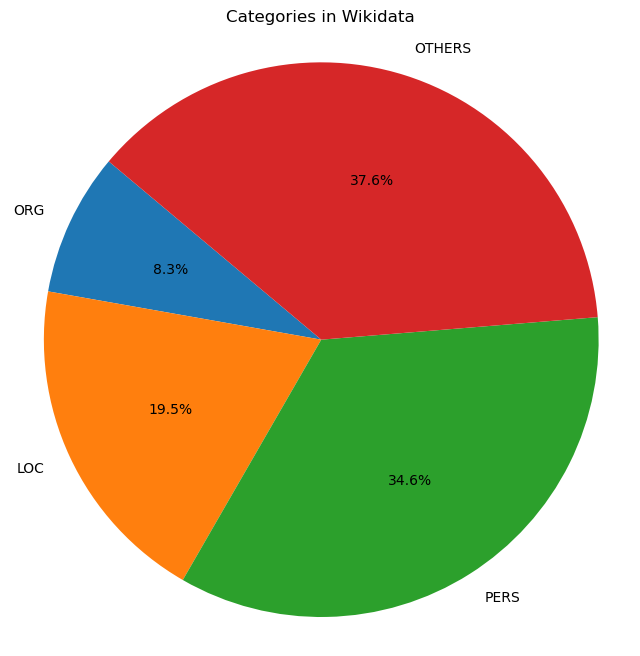

In [20]:
# Define the lengths of each category
ORG_length = len(ORG)
LOC_length = len(LOC)
PERS_length = len(PERS)
OTHERS_length = len(OTHERS)

# Data labels and lengths
categories = ['ORG', 'LOC', 'PERS', 'OTHERS']
lengths = [ORG_length, LOC_length, PERS_length, OTHERS_length]

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the size of the pie chart
plt.pie(lengths, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Categories in Wikidata')  # Set the title of the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

## YAGO4 classification 

In [2]:
##################################
# EXECUTE FROM THIS FOR THE MAPPING
##################################à

json_file_path = "C:/ALESSANDRO/Università/MAGISTRALE/SINTEF_thesis/lamAPI/data/mapping.json"

try:
    # Open the JSON file for reading
    with open(json_file_path, 'r') as json_file:
        mapping = json.load(json_file)
        
except FileNotFoundError:
    print(f"Error: File '{json_file_path}' not found.")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON data: {e}")
except Exception as e:
    print(f"Error loading data from JSON file: {e}")

mapping_yago_wiki = {}

for key, value in mapping.items():
    # Remove trailing '>' from key and value
    fixed_key = key.rstrip('>')
    fixed_value = value.rstrip('>')
    
    # Update the updated_mapping_dict with the fixed key-value pair
    mapping_yago_wiki[fixed_key] = fixed_value

In [3]:
json_file_path = "C:/ALESSANDRO/Università/MAGISTRALE/SINTEF_thesis/lamAPI/data/entity_classification.json"

y_ORG = []
y_LOC = []
y_PERS = []
y_OTHERS = []

# Read the categorized data from the JSON file
try:
    with open(json_file_path, 'r') as json_file:
        data = json.load(json_file)

        # Populate lists based on the loaded data
        y_ORG = data.get("ORG", [])
        y_LOC = data.get("LOC", [])
        y_PERS = data.get("PERS", [])
        y_OTHERS = data.get("OTHERS", [])

    print(f"Data loaded successfully from {json_file_path}")

except FileNotFoundError:
    print(f"Error: File '{json_file_path}' not found.")
except Exception as e:
    print(f"Error loading data from JSON file: {e}")


Data loaded successfully from C:/ALESSANDRO/Università/MAGISTRALE/SINTEF_thesis/lamAPI/data/entity_classification.json


In [4]:
y_ORG_mapped = set([item.rsplit('/', 1)[-1].rstrip('> .') for item in y_ORG]) & set(mapping_yago_wiki.keys())
y_LOC_mapped = set([item.rsplit('/', 1)[-1].rstrip('> .') for item in y_LOC]) & set(mapping_yago_wiki.keys())
y_PERS_mapped = set([item.rsplit('/', 1)[-1].rstrip('> .') for item in y_PERS]) & set(mapping_yago_wiki.keys())

In [5]:
def process_chunk(y_OTHERS_chunk, mapping_keys_set):
    # Preprocess the chunk
    processed_items_chunk = {
        item.split('\t')[0].rstrip('> .').rsplit('/', 1)[-1].rstrip('> .')
        for item in y_OTHERS_chunk
    }
    # Find the intersection with the mapping keys
    return processed_items_chunk & mapping_keys_set

def process_in_chunks(y_OTHERS, mapping_yago_wiki, chunk_size):
    # Convert keys to a set
    mapping_keys_set = set(mapping_yago_wiki.keys())
    
    # Initialize a set to hold the final result
    y_OTHERS_mapped = set()
    
    # Process data in chunks
    for i in range(0, len(y_OTHERS), chunk_size):
        chunk = y_OTHERS[i:i + chunk_size]
        y_OTHERS_mapped.update(process_chunk(chunk, mapping_keys_set))
    
    return y_OTHERS_mapped

# Define chunk size based on your memory constraints
chunk_size = 1000  # Adjust this value as needed

# Process the data
y_OTHERS_mapped = process_in_chunks(y_OTHERS, mapping_yago_wiki, chunk_size)


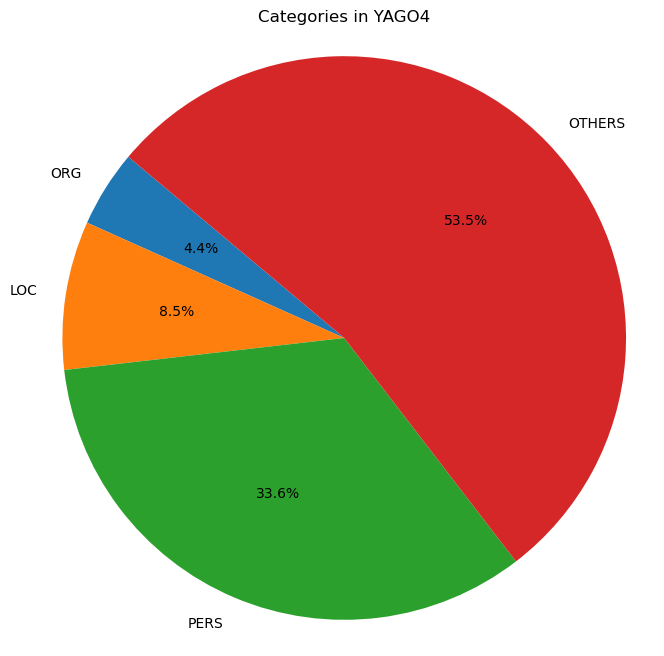

In [7]:
# Define the lengths of each category
ORG_length = len(y_ORG_mapped)
LOC_length = len(y_LOC_mapped)
PERS_length = len(y_PERS_mapped)
OTHERS_length = len(y_OTHERS_mapped)

# Data labels and lengths
categories = ['ORG', 'LOC', 'PERS', 'OTHERS']
lengths = [ORG_length, LOC_length, PERS_length, OTHERS_length]

# Create a pie chart
plt.figure(figsize=(8, 8))  # Set the size of the pie chart
plt.pie(lengths, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Categories in YAGO4')  # Set the title of the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

## Wikidata links

In [ ]:
file_path = "C:/Users/abelo/my-data/yago-wd-sameAs.nt.gz"

try:
    with gzip.open(file_path, 'rb') as f:
        line_count = 0
        chunk = []
        
        # Use tqdm to wrap the file iterator to track progress
        for line in tqdm(f, total=37091475):
            line_str = line.decode('utf-8').strip()
            chunk.append(line_str)
            
        print(f"Processed {line_count} lines")
        
except FileNotFoundError:
    print(f"Error: File '{file_path}' not found.")
except Exception as e:
    print(f"Error processing RDF data: {e}")

100%|██████████| 37091475/37091475 [01:32<00:00, 402957.42it/s]


Processed 0 lines


In [9]:
##################################
# EXECUTE FROM THIS FOR THE MAPPING
##################################à

json_file_path = "./data/mapping.json"

try:
    # Open the JSON file for reading
    with open(json_file_path, 'r') as json_file:
        mapping = json.load(json_file)
        
except FileNotFoundError:
    print(f"Error: File '{json_file_path}' not found.")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON data: {e}")
except Exception as e:
    print(f"Error loading data from JSON file: {e}")


Error: File 'C:/Users/abelo/my-data/mapping.json' not found.


In [6]:
mapping_yago_wiki = {}

for key, value in mapping.items():
    # Remove trailing '>' from key and value
    fixed_key = key.rstrip('>')
    fixed_value = value.rstrip('>')
    
    # Update the updated_mapping_dict with the fixed key-value pair
    mapping_yago_wiki[fixed_key] = fixed_value

In [12]:
merged_list = y_ORG + y_LOC + y_PERS + y_OTHERS
yago_wiki = {}

for el_yago in merged_list:
    url_yago = el_yago.split('\t')
    if len(url_yago) >= 3:
        start_index = url_yago[0].rfind('/') + 1
        end_index = url_yago[0].rfind('>')
        
        # Extract the desired substring
        extracted_string = url_yago[0][start_index:end_index]
        try:
            id = mapping_yago_wiki[extracted_string]
            yago_wiki[url_yago[0]] = id
        except:
            pass
                

In [ ]:

# Specify the file path where you want to save the JSON file
json_file_path = "C:/Users/abelo/my-data/def_mapping.json"

# Write the categorized data to a JSON file
try:
    with open(json_file_path, 'w') as json_file:
        json.dump(yago_wiki, json_file, indent=4)
    print(f"Data saved successfully to {json_file_path}")
except Exception as e:
    print(f"Error saving data to JSON file: {e}")

Data saved successfully to C:/Users/abelo/my-data/def_mapping.json


## YAGO vs Wikidata

In [6]:
total_length_ORG = len(y_ORG_mapped)
total_length_LOC = len(y_LOC_mapped)
total_length_PERS = len(y_PERS_mapped)  # This will be 0 (empty list)
total_length_OTHERS = len(y_OTHERS_mapped)

total_sum = total_length_ORG + total_length_LOC + total_length_PERS + total_length_OTHERS
print(total_sum)

4928891


In [7]:
## REDIRECT REMOVING
json_file_path = "C:/ALESSANDRO/Università/MAGISTRALE/SINTEF_thesis/lamAPI/data/redirects.json"

try:
    # Open the JSON file for reading
    with open(json_file_path, 'r') as json_file:
        redirects = json.load(json_file)
        
except FileNotFoundError:
    print(f"Error: File '{json_file_path}' not found.")
except json.JSONDecodeError as e:
    print(f"Error decoding JSON data: {e}")
except Exception as e:
    print(f"Error loading data from JSON file: {e}")

In [23]:
mapping_yago_wiki[list(y_ORG_mapped)[0]] in redirects

False

In [27]:
len(y_ORG_mapped)

216940

In [28]:
from tqdm import tqdm  # Import tqdm for progress bar

# Define the total number of items for each category using the new variables
total_ORG = len(y_ORG_mapped)
total_LOC = len(y_LOC_mapped)
total_PERS = len(y_PERS_mapped)
total_OTHERS = len(y_OTHERS_mapped)

# Mapping of YAGO entities to Wikidata with tqdm progress bars
ORG_map = []
for el_yago in tqdm(y_ORG_mapped, total=total_ORG, desc="Mapping ORG entities"):
    try:
        if extracted_string not in redirects:
            ORG_map.append(mapping_yago_wiki[el_yago])
    except KeyError:
        # Handle the case where the key is not found in the mapping dictionary
        pass

LOC_map = []
for el_yago in tqdm(y_LOC_mapped, total=total_LOC, desc="Mapping LOC entities"):
    try:
        if extracted_string not in redirects:
            LOC_map.append(mapping_yago_wiki[el_yago])
    except KeyError:
        # Handle the case where the key is not found in the mapping dictionary
        pass

PERS_map = []
for el_yago in tqdm(y_PERS_mapped, total=total_PERS, desc="Mapping PERS entities"):
    try:
        if extracted_string not in redirects:
            PERS_map.append(mapping_yago_wiki[el_yago])
    except KeyError:
        # Handle the case where the key is not found in the mapping dictionary
        pass

OTHERS_map = []
for el_yago in tqdm(y_OTHERS_mapped, total=total_OTHERS, desc="Mapping OTHERS entities"):
    try:
        OTHERS_map.append(mapping_yago_wiki[el_yago])
    except KeyError:
        # Handle the case where the key is not found in the mapping dictionary
        pass


Mapping OTHERS entities: 100%|██████████| 2634921/2634921 [00:16<00:00, 163484.84it/s]


In [61]:
len(y_LOC_mapped)

420113

In [60]:
len(w_LOC)

933345

In [56]:
len(intersection_LOC)

337147

In [32]:
set_w_ORG = set(w_ORG)
set_ORG_map = set(ORG_map)
intersection_ORG = set_w_ORG.intersection(set_ORG_map)
intersection_list_ORG = list(intersection_ORG)

set_w_LOC = set(w_LOC)
set_LOC_map = set(LOC_map)
intersection_LOC = set_w_LOC.intersection(set_LOC_map)
intersection_list_LOC = list(intersection_LOC)

set_w_PERS = set(w_PERS)
set_PERS_map = set(PERS_map)
intersection_PERS = set_w_PERS.intersection(set_PERS_map)
intersection_list_PERS = list(intersection_PERS)

# set_w_OTHERS = set(w_OTHERS)
# set_OTHERS_map = set(OTHERS_map)
# intersection_OTHERS = set_w_OTHERS.intersection(set_OTHERS_map)
# intersection_list_OTHERS = list(intersection_OTHERS)


## Evaluation

In [64]:
###
# FOR WIKIDATA CONSIDER ONLY THE ELEMENTS SHARED WITH YAGO4
###

# Calculate Precision (P), Recall (R), and F1 Score (F1) for ORG category
TP_ORG = len(y_ORG_mapped)
FP_ORG = len(y_ORG_mapped) - len(intersection_list_ORG)
FN_ORG = len(set_w_ORG - set_ORG_map) - len(intersection_list_ORG)  

precision_ORG = TP_ORG / (TP_ORG + FP_ORG) if (TP_ORG + FP_ORG) != 0 else 0
recall_ORG = TP_ORG / (TP_ORG + FN_ORG) if (TP_ORG + FN_ORG) != 0 else 0

# Calculate F1 Score for ORG category
if (precision_ORG + recall_ORG) != 0:
    f1_ORG = 2 * (precision_ORG * recall_ORG) / (precision_ORG + recall_ORG)
else:
    f1_ORG = 0

# Calculate Precision (P), Recall (R), and F1 Score (F1) for LOC category
TP_LOC = len(y_LOC_mapped)
FP_LOC = len(y_LOC_mapped) - len(intersection_list_LOC)
FN_LOC = len(set_w_LOC - set_LOC_map) - len(intersection_list_LOC)

precision_LOC = TP_LOC / (TP_LOC + FP_LOC) if (TP_LOC + FP_LOC) != 0 else 0
recall_LOC = TP_LOC / (TP_LOC + FN_LOC) if (TP_LOC + FN_LOC) != 0 else 0

# Calculate F1 Score for LOC category
if (precision_LOC + recall_LOC) != 0:
    f1_LOC = 2 * (precision_LOC * recall_LOC) / (precision_LOC + recall_LOC)
else:
    f1_LOC = 0

# Calculate Precision (P), Recall (R), and F1 Score (F1) for PERS category
TP_PERS = len(y_PERS_mapped)
FP_PERS = len(y_PERS_mapped) - len(intersection_list_PERS)
FN_PERS = len(w_PERS) - len(intersection_list_PERS)

precision_PERS = TP_PERS / (TP_PERS + FP_PERS) if (TP_PERS + FP_PERS) != 0 else 0
recall_PERS = TP_PERS / (TP_PERS + FN_PERS) if (TP_PERS + FN_PERS) != 0 else 0

# Calculate F1 Score for PERS category
if (precision_PERS + recall_PERS) != 0:
    f1_PERS = 2 * (precision_PERS * recall_PERS) / (precision_PERS + recall_PERS)
else:
    f1_PERS = 0

# Print Precision, Recall, and F1 Score for each category
print(f"ORG - Precision: {precision_ORG:.2f}, Recall: {recall_ORG:.2f}, F1 Score: {f1_ORG:.2f}")
print(f"LOC - Precision: {precision_LOC:.2f}, Recall: {recall_LOC:.2f}, F1 Score: {f1_LOC:.2f}")
print(f"PERS - Precision: {precision_PERS:.2f}, Recall: {recall_PERS:.2f}, F1 Score: {f1_PERS:.2f}")


ORG - Precision: 0.77, Recall: 0.69, F1 Score: 0.73
LOC - Precision: 0.84, Recall: 0.62, F1 Score: 0.71
PERS - Precision: 0.99, Recall: 0.99, F1 Score: 0.99


In [35]:
print(f"Length of intersection for ORG: {len(intersection_list_ORG)}")
print(f"Length of intersection for LOC: {len(intersection_list_LOC)}")
print(f"Length of intersection for PERS: {len(intersection_list_PERS)}")
#print(f"Length of intersection for OTHERS: {len(intersection_list_OTHERS)}")

Length of intersection for ORG: 151927
Length of intersection for LOC: 337147
Length of intersection for PERS: 1643592


In [14]:
print(f"Length of intersection for ORG: {len(intersection_list_ORG)}")
print(f"Length of intersection for LOC: {len(intersection_list_LOC)}")
print(f"Length of intersection for PERS: {len(intersection_list_PERS)}")
#print(f"Length of intersection for OTHERS: {len(intersection_list_OTHERS)}")

Length of intersection for ORG: 165
Length of intersection for LOC: 1877
Length of intersection for PERS: 7863


In [15]:
print(f"ORG = {len(y_ORG_mapped)}")
print(f"LOC = {len(y_LOC_mapped)}")
print(f"PERS = {len(y_PERS_mapped)}")
print(f"OTHERS = {len(y_OTHERS_mapped)}")

ORG = 216940
LOC = 420113
PERS = 1656917
OTHERS = 2634921


In [ ]:
print(f"ORG = {len(y_ORG)}")
print(f"LOC = {len(y_LOC)}")
print(f"PERS = {len(y_PERS)}")
print(f"OTHERS = {len(y_OTHERS)}")

ORG = 276141
LOC = 450463
PERS = 1691133
OTHERS = 2976312


In [ ]:
print(f"ORG = {len(w_ORG)}")
print(f"LOC = {len(w_LOC)}")
print(f"PERS = {len(w_PERS)}")
print(f"OTHERS = {len(w_OTHERS)}")

ORG = 399081
LOC = 933345
PERS = 1659060
OTHERS = 1802198


In [ ]:
y_ORG

['<http://yago-knowledge.org/resource/Varena,_Trentino>',
 '<http://yago-knowledge.org/resource/Carroll_Community_College>',
 '<http://yago-knowledge.org/resource/Leif_Erikson_(band)>',
 '<http://yago-knowledge.org/resource/The_Dukes_of_Stratosphear>',
 '<http://yago-knowledge.org/resource/Lynden,_Washington>',
 '<http://yago-knowledge.org/resource/Infinite_System>',
 '<http://yago-knowledge.org/resource/Mannafields_Christian_School>',
 '<http://yago-knowledge.org/resource/UK_Chinese_Ensemble>',
 '<http://yago-knowledge.org/resource/Kettle_Falls,_Washington>',
 '<http://yago-knowledge.org/resource/New_York_Circus_Arts_Academy>',
 '<http://yago-knowledge.org/resource/Epes,_Alabama>',
 '<http://yago-knowledge.org/resource/AS_Nianan>',
 '<http://yago-knowledge.org/resource/AS_Nianan>',
 '<http://yago-knowledge.org/resource/Villanova_Wildcats_swimming_and_diving>',
 '<http://yago-knowledge.org/resource/Villanova_Wildcats_swimming_and_diving>',
 '<http://yago-knowledge.org/resource/Loučka_(